In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df=pd.read_csv('Social_Network_Ads.csv')

In [87]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [88]:
df['Gender']=df['Gender'].str.replace(r"Male","1")
df['Gender']=df['Gender'].str.replace(r"Female","0")

In [89]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [90]:
x=df[['Gender','Age','EstimatedSalary']]

In [91]:
y=df['Purchased']

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
support=SVC(kernel='linear')
support.fit(x_train,y_train)

SVC(kernel='linear')

In [11]:
y_pred_linear=support.predict(x_test)

In [61]:
cv_svm_linear=confusion_matrix(y_test,y_pred_linear)
cr_svm_linear=classification_report(y_test,y_pred_linear)

print(cv_svm_linear)
print(cr_svm_linear)
cr_svm_score_linear=support.score(x_test,y_test)
print(cr_svm_score_linear)

[[49  7]
 [ 8 16]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        56
           1       0.70      0.67      0.68        24

    accuracy                           0.81        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.81      0.81      0.81        80

0.7


In [62]:
support=SVC(kernel='rbf')
support.fit(x_train,y_train)
y_pred_rbf=support.predict(x_test)
cv_svm_rbf=confusion_matrix(y_test,y_pred_rbf)
cr_svm_rbf=classification_report(y_test,y_pred_rbf)
print(cv_svm_rbf)
print(cr_svm_rbf)

cr_svm_score_rbf=support.score(x_test,y_test)
print(cr_svm_score_rbf)

[[49  7]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        56
           1       0.76      0.92      0.83        24

    accuracy                           0.89        80
   macro avg       0.86      0.90      0.87        80
weighted avg       0.90      0.89      0.89        80

0.8875


In [63]:
support=SVC(kernel='sigmoid')
support.fit(x_train,y_train)
y_pred_sigmoid=support.predict(x_test)
cv_svm_sigmoid=confusion_matrix(y_test,y_pred_sigmoid)
cr_svm_sigmoid=classification_report(y_test,y_pred_sigmoid)
print(cv_svm_sigmoid)
print(cr_svm_sigmoid)
cr_svm_score_sigmoid=support.score(x_test,y_test)
print(cr_svm_score_sigmoid)

[[46 10]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        56
           1       0.64      0.75      0.69        24

    accuracy                           0.80        80
   macro avg       0.76      0.79      0.77        80
weighted avg       0.81      0.80      0.80        80

0.8


In [64]:
support=SVC(kernel='poly')
support.fit(x_train,y_train)
y_pred_poly=support.predict(x_test)
cv_svm_poly=confusion_matrix(y_test,y_pred_poly)
cr_svm_poly=classification_report(y_test,y_pred_poly)
print(cv_svm_poly)
print(cr_svm_poly)
cr_svm_score_poly=support.score(x_test,y_test)
print(cr_svm_score_poly)

[[50  6]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       0.75      0.75      0.75        24

    accuracy                           0.85        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.85      0.85      0.85        80

0.85


In [83]:
scores

[0.875,
 0.925,
 0.8875,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125]

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores=[]
for n in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    z=metrics.accuracy_score(y_test,y_pred_knn)
    scores.append(z)
    print('Accuracy for n=',n," is ",z)

Accuracy for n= 2  is  0.75
Accuracy for n= 3  is  0.8
Accuracy for n= 4  is  0.825
Accuracy for n= 5  is  0.8625
Accuracy for n= 6  is  0.8625
Accuracy for n= 7  is  0.85
Accuracy for n= 8  is  0.875
Accuracy for n= 9  is  0.825
Accuracy for n= 10  is  0.8375
Accuracy for n= 11  is  0.8375
Accuracy for n= 12  is  0.875
Accuracy for n= 13  is  0.875
Accuracy for n= 14  is  0.85
Accuracy for n= 15  is  0.825
Accuracy for n= 16  is  0.85
Accuracy for n= 17  is  0.8125
Accuracy for n= 18  is  0.825
Accuracy for n= 19  is  0.8125


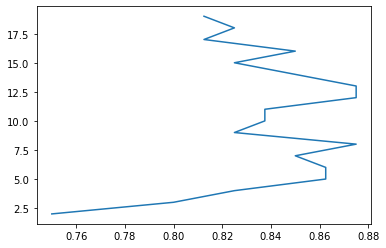

In [94]:
r=range(2,20)
plt.plot(scores,r)

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred_gauss=classifier.predict(x_test)

In [66]:
print(confusion_matrix(y_test,y_pred_gauss))
print(classification_report(y_test,y_pred_gauss))
nb_score=classifier.score(x_test,y_test)
print(nb_score)

[[50  6]
 [ 3 21]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        56
           1       0.78      0.88      0.82        24

    accuracy                           0.89        80
   macro avg       0.86      0.88      0.87        80
weighted avg       0.89      0.89      0.89        80

0.8875


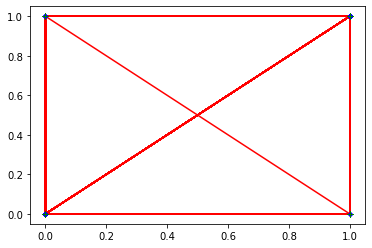

In [69]:
plt.plot(y_test,y_pred_linear,'r-')
plt.plot(y_test,y_pred_gauss,'b.')
plt.plot(y_test,y_pred_knn,'g+')


In [33]:
y_pred_linear

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [34]:
y_pred_gauss

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [35]:
y_pred_knn

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [36]:
y_test

58     0
107    0
94     0
252    1
399    1
      ..
161    0
171    0
53     0
334    1
95     0
Name: Purchased, Length: 80, dtype: int64

In [41]:
plt.plot(y_test,y_pred_linear,'r-')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 432x288 with 1 Axes>